## Tips and Tricks for Loading Large CSV Files into Pandas DataFrames
- https://towardsdatascience.com/tips-and-tricks-for-loading-large-csv-files-into-pandas-dataframes-part-1-fac6e351fe79

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right"> Initial upload: 2023.7.2</div>
<div style="text-align: right"> Last update: 2023.7.2</div>

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
#plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
import time

In [3]:
start = time.time()

df = pd.read_csv("data/custom/custom_1988_2020.csv")

print(time.time() - start, ' seconds')
display(df)
display(df.info())

30.41594624519348  seconds


,198801,1,103,100,000000190,0,35843,34353
0,198801,1,103,100,120991000,0,1590,4154
1,198801,1,103,100,210390900,0,4500,2565
2,198801,1,103,100,220890200,0,3000,757
3,198801,1,103,100,240220000,0,26000,40668
4,198801,1,103,100,250410000,0,5,8070
...,...,...,...,...,...,...,...,...
113607316,202012,2,627,200,843149020,0,228,602
113607317,202012,2,628,100,852580000,1,20,260
113607318,202012,2,628,104,847180000,0,9,1775
113607319,202012,2,702,104,30119000,179,16,255


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113607321 entries, 0 to 113607320
Data columns (total 8 columns):
 #   Column     Dtype
---  ------     -----
 0   198801     int64
 1   1          int64
 2   103        int64
 3   100        int64
 4   000000190  int64
 5   0          int64
 6   35843      int64
 7   34353      int64
dtypes: int64(8)
memory usage: 6.8 GB


None

In [4]:
df.columns

Index(['198801', '1', '103', '100', '000000190', '0', '35843', '34353'], dtype='object')

헤더 제외하고 다시 읽어오기

In [5]:
# loading with no headers specified
df = pd.read_csv("./data/custom/custom_1988_2020.csv", header=None)
display(df)

,0,1,2,3,4,5,6,7
0,198801,1,103,100,190,0,35843,34353
1,198801,1,103,100,120991000,0,1590,4154
2,198801,1,103,100,210390900,0,4500,2565
3,198801,1,103,100,220890200,0,3000,757
4,198801,1,103,100,240220000,0,26000,40668
...,...,...,...,...,...,...,...,...
113607317,202012,2,627,200,843149020,0,228,602
113607318,202012,2,628,100,852580000,1,20,260
113607319,202012,2,628,104,847180000,0,9,1775
113607320,202012,2,702,104,30119000,179,16,255


컬럼명을 추가하여 읽어보기

In [6]:
df = pd.read_csv("./data/custom/custom_1988_2020.csv", header=None,
                 names=['YearMonth', 'ExportImport', 'HSCode', 'Customs', 
                        'Country', 'Q1', 'Q2_Quantity', 'Value'])
display(df)

,YearMonth,ExportImport,HSCode,Customs,Country,Q1,Q2_Quantity,Value
0,198801,1,103,100,190,0,35843,34353
1,198801,1,103,100,120991000,0,1590,4154
2,198801,1,103,100,210390900,0,4500,2565
3,198801,1,103,100,220890200,0,3000,757
4,198801,1,103,100,240220000,0,26000,40668
...,...,...,...,...,...,...,...,...
113607317,202012,2,627,200,843149020,0,228,602
113607318,202012,2,628,100,852580000,1,20,260
113607319,202012,2,628,104,847180000,0,9,1775
113607320,202012,2,702,104,30119000,179,16,255


특정 컬럼만 불러오기  
- 데이터 양이 많다면 특정 컬럼만 불러올 수 있다.

In [7]:
start = time.time()

df = pd.read_csv("./data/custom/custom_1988_2020.csv", 
                 header=None, 
                 names=['YearMonth', 'ExportImport', 'HSCode', 'Customs', 
                        'Country', 'Q1', 'Q2_Quantity', 'Value'],                 
                 usecols = ["YearMonth", "Value"])

print(time.time() - start, ' seconds')
display(df)
display(df.info())

21.106717824935913  seconds


,YearMonth,Value
0,198801,34353
1,198801,4154
2,198801,2565
3,198801,757
4,198801,40668
...,...,...
113607317,202012,602
113607318,202012,260
113607319,202012,1775
113607320,202012,255


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113607322 entries, 0 to 113607321
Data columns (total 2 columns):
 #   Column     Dtype
---  ------     -----
 0   YearMonth  int64
 1   Value      int64
dtypes: int64(2)
memory usage: 1.7 GB


None

- 메모리 사용량이 줄었다.

usecols는 컬럼이름이 아니라 위치를 표시해도 된다.

In [8]:
start = time.time()

df = pd.read_csv("./data/custom/custom_1988_2020.csv", 
                 header=None, 
                 names=['YearMonth', 'ExportImport', 'HSCode', 'Customs', 
                        'Country', 'Q1', 'Q2_Quantity', 'Value'],                 
                 usecols = [0, 7])

print(time.time() - start, ' seconds')
display(df)
display(df.info())

20.902061462402344  seconds


,YearMonth,Value
0,198801,34353
1,198801,4154
2,198801,2565
3,198801,757
4,198801,40668
...,...,...
113607317,202012,602
113607318,202012,260
113607319,202012,1775
113607320,202012,255


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113607322 entries, 0 to 113607321
Data columns (total 2 columns):
 #   Column     Dtype
---  ------     -----
 0   YearMonth  int64
 1   Value      int64
dtypes: int64(2)
memory usage: 1.7 GB


None

lambda를 사용해서 사용하지 않는 컬럼을 제외할 수도 있다. 

In [9]:
df = pd.read_csv("./data/custom/custom_1988_2020.csv", 
                 header=None, 
                 names=['YearMonth', 'ExportImport', 'HSCode', 'Customs', 
                        'Country', 'Q1', 'Q2_Quantity', 'Value'],                 
                 usecols = lambda column: column not in ['Country'])
display(df)

,YearMonth,ExportImport,HSCode,Customs,Q1,Q2_Quantity,Value
0,198801,1,103,100,0,35843,34353
1,198801,1,103,100,0,1590,4154
2,198801,1,103,100,0,4500,2565
3,198801,1,103,100,0,3000,757
4,198801,1,103,100,0,26000,40668
...,...,...,...,...,...,...,...
113607317,202012,2,627,200,0,228,602
113607318,202012,2,628,100,1,20,260
113607319,202012,2,628,104,0,9,1775
113607320,202012,2,702,104,179,16,255


다음 형태로도 사용가능

```python
usecols = lambda column: "Q" in column
usecols = lambda column: len(column) > 7
```

일부 row만 읽어오기

In [10]:
start = time.time()

df = pd.read_csv("./data/custom/custom_1988_2020.csv", 
                 header=None, 
                 names=['YearMonth', 'ExportImport', 'HSCode', 'Customs', 
                        'Country', 'Q1', 'Q2_Quantity', 'Value'],                 
                 nrows=100)

print(time.time() - start, ' seconds')
display(df[:15])
display(df.info())

0.013425111770629883  seconds


,YearMonth,ExportImport,HSCode,Customs,Country,Q1,Q2_Quantity,Value
0,198801,1,103,100,190,0,35843,34353
1,198801,1,103,100,120991000,0,1590,4154
2,198801,1,103,100,210390900,0,4500,2565
3,198801,1,103,100,220890200,0,3000,757
4,198801,1,103,100,240220000,0,26000,40668
5,198801,1,103,100,250410000,0,5,8070
6,198801,1,103,100,271000700,0,374,2485
7,198801,1,103,100,271220000,0,400,616
8,198801,1,103,100,280300000,0,1900,2020
9,198801,1,103,100,280610000,0,1000,227


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YearMonth     100 non-null    int64
 1   ExportImport  100 non-null    int64
 2   HSCode        100 non-null    int64
 3   Customs       100 non-null    int64
 4   Country       100 non-null    int64
 5   Q1            100 non-null    int64
 6   Q2_Quantity   100 non-null    int64
 7   Value         100 non-null    int64
dtypes: int64(8)
memory usage: 6.4 KB


None

특정 row skip

In [11]:
df = pd.read_csv("./data/custom/custom_1988_2020.csv", 
                 header=None, 
                 names=['YearMonth', 'ExportImport', 'HSCode', 'Customs', 
                        'Country', 'Q1', 'Q2_Quantity', 'Value'],                 
                 skiprows=2,
                 nrows=100
)
display(df[:15])

,YearMonth,ExportImport,HSCode,Customs,Country,Q1,Q2_Quantity,Value
0,198801,1,103,100,210390900,0,4500,2565
1,198801,1,103,100,220890200,0,3000,757
2,198801,1,103,100,240220000,0,26000,40668
3,198801,1,103,100,250410000,0,5,8070
4,198801,1,103,100,271000700,0,374,2485
5,198801,1,103,100,271220000,0,400,616
6,198801,1,103,100,280300000,0,1900,2020
7,198801,1,103,100,280610000,0,1000,227
8,198801,1,103,100,281119000,0,1762,1693
9,198801,1,103,100,281210000,0,15900,1621


lambda를 사용해서 짝수 열만 추출할 수 있다.

In [12]:
df = pd.read_csv("./data/custom/custom_1988_2020.csv", 
                 header=None, 
                 names=['YearMonth', 'ExportImport', 'HSCode', 'Customs', 
                        'Country', 'Q1', 'Q2_Quantity', 'Value'],                 
                 skiprows=lambda x: x % 2 == 0,
                 nrows=100
)

print(time.time() - start, ' seconds')
display(df[:15])

0.04843735694885254  seconds


,YearMonth,ExportImport,HSCode,Customs,Country,Q1,Q2_Quantity,Value
0,198801,1,103,100,120991000,0,1590,4154
1,198801,1,103,100,220890200,0,3000,757
2,198801,1,103,100,250410000,0,5,8070
3,198801,1,103,100,271220000,0,400,616
4,198801,1,103,100,280610000,0,1000,227
5,198801,1,103,100,281210000,0,15900,1621
6,198801,1,103,100,281810000,0,2000,819
7,198801,1,103,100,282110000,0,3750,235
8,198801,1,103,100,283429000,0,500,245
9,198801,1,103,100,284190000,0,750,1110


In [13]:
del df

## Tips and Tricks for Loading Large CSV Files into Pandas DataFrames — Part 2
-  https://towardsdatascience.com/tips-and-tricks-for-loading-large-csv-files-into-pandas-dataframes-part-2-5fc02fc4e3ab

이제 더 큰 데이터를 다뤄보자.

In [14]:
# start = time.time()
# df = pd.read_csv("./data/itineraries/itineraries.csv")
# print(time.time() - start, "seconds")


- 20분 소요됨

청크를 사용해서 로드하기  
- 전체가 아니라 일부만 로드하기

In [15]:
start = time.time()
chunks = pd.read_csv('./data/itineraries/itineraries.csv', chunksize=100000)
print(time.time() - start, ' seconds')

# result is a TextFileReader object
chunks

0.0031538009643554688  seconds


위 코드에서 컨트롤을 실행하면 거의 즉시 반환되며, 출력에는 chunks 변수의 유형이 pandas.io.parsers.readers.TextFileReader인 것으로 표시됩니다.

청크를 CSV 파일의 첫 번째 행을 가리키는 파일 포인터로 생각하면 처음 100,000개의 행을 읽기 시작할 준비가 된 것입니다(chunksize 매개변수에 지정된 대로).

사실 청크는 iterable이다. 따라서 이터레이션을 통해서 100000개의 샘플을 로딩할 수 있다.   

예를 들어 청크 변수를 반복하는 방법을 살펴보기 위해 process_chunk()라는 함수를 정의해 보겠습니다. 이 함수에서는 startingAirport 열의 값이 "ATL"인 모든 행만 가져옵니다:

In [16]:
def process_chunk(df):
    df = df.query('startingAirport == "ATL"')
    print(df.shape)
    return df

In [17]:
chunks

In [18]:
chunk_list = []                # used for storing dataframes
for chunk in chunks:           # each chunk is a dataframe    
    # perform data filtering 
    filtered_chunk = process_chunk(chunk)
    
    # Once the data filtering is done, append the filtered chunk to list
    chunk_list.append(filtered_chunk)

(6972, 27)
(5969, 27)
(6825, 27)
(6259, 27)
(6781, 27)
(6163, 27)
(6333, 27)
(6525, 27)
(6551, 27)
(6258, 27)
(6137, 27)
(6795, 27)
(6231, 27)
(6677, 27)
(6595, 27)
(6224, 27)
(6501, 27)
(6243, 27)
(6612, 27)
(6777, 27)
(7235, 27)
(6209, 27)
(6810, 27)
(6203, 27)
(6506, 27)
(6653, 27)
(6573, 27)
(6608, 27)
(6406, 27)
(6527, 27)
(6397, 27)
(6879, 27)
(6499, 27)
(6090, 27)
(6240, 27)
(6144, 27)
(6712, 27)
(6802, 27)
(6456, 27)
(6446, 27)
(6254, 27)
(6541, 27)
(6152, 27)
(7673, 27)
(6130, 27)
(6981, 27)
(6834, 27)
(6801, 27)
(6422, 27)
(5965, 27)
(6771, 27)
(6729, 27)
(6599, 27)
(6081, 27)
(6388, 27)
(6455, 27)
(6865, 27)
(6305, 27)
(6580, 27)
(5852, 27)
(6340, 27)
(6982, 27)
(6811, 27)
(6093, 27)
(6570, 27)
(6262, 27)
(6948, 27)
(6234, 27)
(6426, 27)
(6621, 27)
(5830, 27)
(6523, 27)
(6748, 27)
(6721, 27)
(6147, 27)
(6441, 27)
(6374, 27)
(7001, 27)
(6223, 27)
(6071, 27)
(6305, 27)
(5996, 27)
(7253, 27)
(6154, 27)
(6552, 27)
(5838, 27)
(6819, 27)
(6684, 27)
(6899, 27)
(6545, 27)
(5905, 27)

In [19]:
df_concat = pd.concat(chunk_list)

In [20]:
display(df_concat)

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82137139,30bd7f2f2fadc4af6ef9198866ecd620,2022-10-05,2022-11-12,ATL,SFO,KAVQA0ML,PT8H53M,0,False,False,...,1668312060||1668325920,2022-11-12T20:01:00.000-08:00||2022-11-12T23:5...,LAX||SFO,ATL||LAX,Delta||Delta,DL||DL,||Airbus A319,18120||5040,1943||339,coach||coach
82137140,43a5467f4e7db9f949d33d62b0fb1260,2022-10-05,2022-11-12,ATL,SFO,KAVQA0ML,PT9H23M,0,False,False,...,1668286320||1668301980,2022-11-12T12:52:00.000-08:00||2022-11-12T17:1...,LAX||SFO,ATL||LAX,Delta||Delta,DL||DL,||Airbus A319,18120||4860,1943||339,coach||coach
82137141,0a6cda479ba6e2bb2aefc6e80eb3c379,2022-10-05,2022-11-12,ATL,SFO,KA3NX0MC,PT10H,1,False,False,...,1668302700||1668329940,2022-11-12T20:25:00.000-05:00||2022-11-13T00:5...,JFK||SFO,ATL||JFK,Delta||Delta,DL||DL,Boeing 757-200||,8760||24240,761||2577,coach||coach
82137142,d5520a2d922f39fe3692e0614f00df4e,2022-10-05,2022-11-12,ATL,SFO,KA3NX0MC,PT12H4M,0,False,False,...,1668282480||1668317640,2022-11-12T14:48:00.000-05:00||2022-11-12T21:3...,JFK||SFO,ATL||JFK,Delta||Delta,DL||DL,Boeing 757-200||,8280||24540,761||2577,coach||coach


In [21]:
df_concat.memory_usage()

Index                                42496224
legId                                42496224
searchDate                           42496224
flightDate                           42496224
startingAirport                      42496224
destinationAirport                   42496224
fareBasisCode                        42496224
travelDuration                       42496224
elapsedDays                          42496224
isBasicEconomy                        5312028
isRefundable                          5312028
isNonStop                             5312028
baseFare                             42496224
totalFare                            42496224
seatsRemaining                       42496224
totalTravelDistance                  42496224
segmentsDepartureTimeEpochSeconds    42496224
segmentsDepartureTimeRaw             42496224
segmentsArrivalTimeEpochSeconds      42496224
segmentsArrivalTimeRaw               42496224
segmentsArrivalAirportCode           42496224
segmentsDepartureAirportCode      

몇 가지 간단한 계산을 통해 이 모든 열(부울 열 3개 제외)의 각 행이 8바이트(42496224바이트/5312028행)를 사용한다는 것을 알 수 있습니다. 왜 그럴까요? 유형이 int64 및 float64인 열의 경우 64비트는 8바이트와 같으므로 이는 합리적입니다. 예를 들어 elapsedDay 열의 각 값은 8바이트(int64)를 차지합니다:

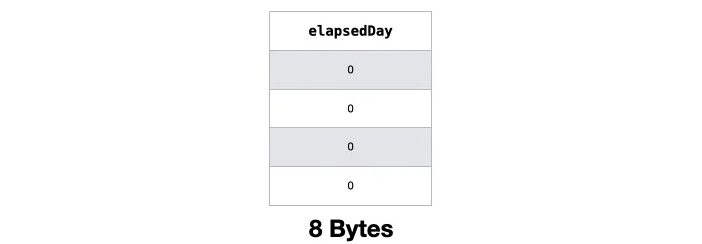

object 컬럼은 내부적으로 해당 값을 다른 메모리에 별도 저장한다.   
따라서 object에 저장된 실제 값은, 객체를 저장하는 위치의 메모리 주소이다.   
아래는 searchDate 컬럼의 예시이다.

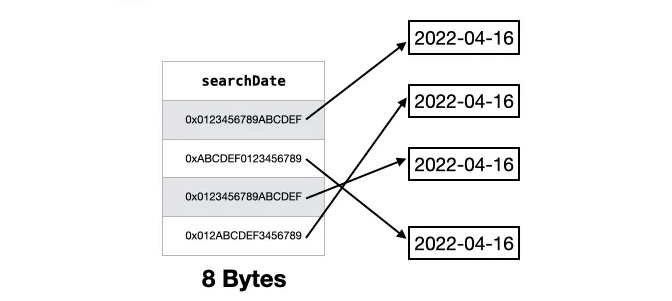

object 컬럼이 어느정도의 메모리를 차지하는지 확인하기 위해 다음과 같이 deep 옵션을 사용해서 살펴보자.

In [22]:
df_concat.memory_usage(deep=True)

Index                                 42496224
legId                                472770492
searchDate                           355905876
flightDate                           355905876
startingAirport                      318721680
destinationAirport                   318721680
fareBasisCode                        343071603
travelDuration                       339818490
elapsedDays                           42496224
isBasicEconomy                         5312028
isRefundable                           5312028
isNonStop                              5312028
baseFare                              42496224
totalFare                             42496224
seatsRemaining                        42496224
totalTravelDistance                   42496224
segmentsDepartureTimeEpochSeconds    403417584
segmentsDepartureTimeRaw             579572987
segmentsArrivalTimeEpochSeconds      403417584
segmentsArrivalTimeRaw               579572987
segmentsArrivalAirportCode           338518225
segmentsDepar

예를 들어, searchDate 열의 각 값은 67바이트(355905876바이트/5312028행)를 사용하고, startingAirport 열의 각 값은 60바이트(318721680바이트/5312028행)를 사용합니다.

### 타입 바꾸기

앞에서 두 컬럼은 각 값이 67바이트를 차지하는 것을 보았다.  
searchDate 컬럼은 날짜가 포함되어있으므로 object보다는 datetime64로 변환하는 것이 좋다.  
8바이트만 차지하므로 메모리도 절약할 수있다.   
여기서는 날짜관련 두개 컬럼을 바꿔보겠다.

In [23]:
df_concat["searchDate"] = df_concat["searchDate"].astype('datetime64')
df_concat["flightDate"] = df_concat["flightDate"].astype('datetime64')

In [24]:
df_concat.memory_usage(deep = True)

Index                                 42496224
legId                                472770492
searchDate                            42496224
flightDate                            42496224
startingAirport                      318721680
destinationAirport                   318721680
fareBasisCode                        343071603
travelDuration                       339818490
elapsedDays                           42496224
isBasicEconomy                         5312028
isRefundable                           5312028
isNonStop                              5312028
baseFare                              42496224
totalFare                             42496224
seatsRemaining                        42496224
totalTravelDistance                   42496224
segmentsDepartureTimeEpochSeconds    403417584
segmentsDepartureTimeRaw             579572987
segmentsArrivalTimeEpochSeconds      403417584
segmentsArrivalTimeRaw               579572987
segmentsArrivalAirportCode           338518225
segmentsDepar

In [25]:
df_concat.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5312028 entries, 0 to 82137143
Data columns (total 27 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   legId                              object        
 1   searchDate                         datetime64[ns]
 2   flightDate                         datetime64[ns]
 3   startingAirport                    object        
 4   destinationAirport                 object        
 5   fareBasisCode                      object        
 6   travelDuration                     object        
 7   elapsedDays                        int64         
 8   isBasicEconomy                     bool          
 9   isRefundable                       bool          
 10  isNonStop                          bool          
 11  baseFare                           float64       
 12  totalFare                          float64       
 13  seatsRemaining                     int64         
 14  t

- 메모리 사용량이 7.1에서 6.5로 줄었다.

### 컬럼 다운캐스팅하기

seatsRemaining 컬럼을 살펴보자.  
데이터의 범위를 확인해서 down-casting할 수있다.

In [26]:
df_concat['seatsRemaining'].min() # 0 
df_concat['seatsRemaining'].max() # 10

10

하지만 이 열을 저장하는 데 int64 유형이 사용되었습니다. int64 열은 -(2⁶³ - 1)에서 2⁶³까지의 값을 저장할 수 있습니다. 분명히 이 데이터 유형은 음수가 아닌 값만 저장하고 최대값이 10을 넘지 않는 이 열에는 지나치게 많은 데이터 유형입니다. 다른 열(예: baseFare, totalFare, totalTravelDistance)에도 동일하게 적용될 수 있습니다. 이러한 메모리 낭비를 줄이려면 이러한 열에서 사용되는 유형을 해당 값을 보유하기에 충분한 유형으로 다운캐스트해야 합니다. 예를 들어, 좌석 잔여 열은 0에서 (2⁸ - 1) 또는 0에서 255까지의 값을 보유할 수 있는 uint8 데이터 유형으로 잘 작동할 수 있습니다.

이제 모든 숫자 열(정수 및 부동 소수점)을 다운캐스트해 보겠습니다.

먼저, Pandas 데이터프레임 또는 시리즈를 받아 총 메모리 사용량을 반환하는 memory_usage()라는 함수를 정의합니다:

In [27]:
def mem_usage(obj):
    if isinstance(obj, pd.DataFrame):
        usage_b = obj.memory_usage(deep = True).sum()
    else: # DF가 아니라 pd.series일 경우
        usage_b = obj.memory_usage(deep = True)
        
    usage_mb = usage_b / 1024 ** 2     # bytes to megabytes    
    return "{:03.2f} MB".format(usage_mb)

이제 다운캐스트하는 함수를 만들어보자.

In [28]:
def downcast_type(df, old_type, new_type):
    df_oldtype = df.select_dtypes(include=[old_type])
    
    df_newtype = df_oldtype.apply(pd.to_numeric, downcast= new_type)
    
    # print out the memory usage of old_type and new_type
    print(f'{old_type} memory usage: {mem_usage(df_oldtype)}')
    print(f'{new_type} memory usage: {mem_usage(df_newtype)}')

    return df_newtype

- ‘integer’ or ‘signed’: smallest signed int dtype (min.: np.int8)
- ‘unsigned’: smallest unsigned int dtype (min.: np.uint8)
- ‘float’: smallest float dtype (min.: np.float32)

In [29]:
df_converted_int = downcast_type(df_concat, "int", "unsigned")

int memory usage: 121.58 MB
unsigned memory usage: 50.66 MB


In [30]:
df_converted_float = downcast_type(df_concat, "float", "float")

float memory usage: 162.11 MB
float memory usage: 101.32 MB


이제 이를 반영한 데이터셋을 살펴보자

In [31]:
# make a copy of the dataframe and replace the columns with the downcasted types
optimized_df = df_concat.copy()
optimized_df[df_converted_int.columns] = df_converted_int
optimized_df[df_converted_float.columns] = df_converted_float

In [32]:
optimized_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5312028 entries, 0 to 82137143
Data columns (total 27 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   legId                              object        
 1   searchDate                         datetime64[ns]
 2   flightDate                         datetime64[ns]
 3   startingAirport                    object        
 4   destinationAirport                 object        
 5   fareBasisCode                      object        
 6   travelDuration                     object        
 7   elapsedDays                        uint8         
 8   isBasicEconomy                     bool          
 9   isRefundable                       bool          
 10  isNonStop                          bool          
 11  baseFare                           float32       
 12  totalFare                          float32       
 13  seatsRemaining                     uint8         
 14  t

- 메모리가 더 줄어들었다.

### Object를 카테고리로 변환하기

In [33]:
# get all the columns with the Object type
df_obj = optimized_df.select_dtypes(include=['object']).copy()
df_unique_objs = df_obj.describe()

print(df_unique_objs)

                                   legId startingAirport destinationAirport  \
count                            5312028         5312028            5312028   
unique                            362460               1                 15   
top     3c18dd8a485f8f15b31e68982f53db00             ATL                LAX   
freq                                  60         5312028             709809   

       fareBasisCode travelDuration segmentsDepartureTimeEpochSeconds  \
count        5312028        5312028                           5312028   
unique          6035           1480                            320710   
top         KAUOA0MQ        PT2H15M                        1663672500   
freq          107336          79204                               377   

             segmentsDepartureTimeRaw segmentsArrivalTimeEpochSeconds  \
count                         5312028                         5312028   
unique                         321658                          344387   
top     2022-09-20T

이 아이디어는 각 개체 열의 고유 값 수가 어떻게 되는지 확인하는 것입니다. 예를 들어 고유 값이 1개(ATL)만 있는 startingAirport 열을 생각해 보겠습니다.   

이 경우 데이터 프레임에 "ATL" 문자열을 5312028번 저장하는 것은 현명한 선택이 아닙니다. 마찬가지로, destinationAirport 열의 경우 고유 값이 15개뿐이므로 열에 중복된 값이 많이 저장되어 있습니다.

이러한 중복 값을 모두 저장하는 대신 startingAirport 및 destinationAirport와 같은 열을 범주 데이터 유형으로 변환하는 것이 더 좋습니다. 범주 데이터 유형에서는 열의 고유 값이 별도의 참조 테이블에 저장되고 값의 인덱스가 해당 열 내에 저장됩니다. 다음 그림은 이 개념을 설명합니다:


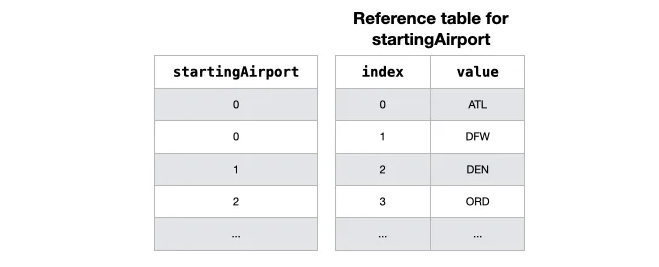

- 객체 열을 카테고리 유형으로 변환하면 많은 메모리를 절약할 수 있습니다. 하지만 한 가지 주의할 점이 있습니다. 열에 고유 값이 많이 포함되어 있는 경우 열을 범주 필드로 변환해도 메모리가 절약되지 않으며 오히려 더 많은 메모리를 사용하게 됩니다. 따라서 각 개체 열에 대한 고유 값의 비율을 계산하고 싶습니다:

열에 있는 값의 50% 이상이 고유한 경우 범주 유형으로 변환하는 것보다 개체 유형을 계속 사용하는 것이 더 적합합니다. 다음 출력은 고유성이 50%를 초과하는 개체 열이 없음을 보여줍니다:

In [34]:
df_unique_objs

,legId,startingAirport,destinationAirport,fareBasisCode,travelDuration,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
count,5312028,5312028,5312028,5312028,5312028,5312028,5312028,5312028,5312028,5312028,5312028,5312028,5312028,5155578,5312028,5312028,5312028
unique,362460,1,15,6035,1480,320710,321658,344387,348155,1439,637,59,59,2514,24456,1352,34
top,3c18dd8a485f8f15b31e68982f53db00,ATL,LAX,KAUOA0MQ,PT2H15M,1663672500,2022-09-20T07:15:00.000-04:00,1661900340,2022-08-30T18:59:00.000-04:00,LGA,ATL,Delta,DL,Airbus A321,8100,None||None,coach||coach
freq,60,5312028,709809,107336,79204,377,377,237,237,192573,1754883,1031841,1031841,427699,79204,556848,3168404


In [35]:
df_unique_objs.iloc[1, :] / df_unique_objs.iloc[0, :] * 100

legId                                6.823383
startingAirport                      0.000019
destinationAirport                   0.000282
fareBasisCode                         0.11361
travelDuration                       0.027861
segmentsDepartureTimeEpochSeconds    6.037431
segmentsDepartureTimeRaw             6.055277
segmentsArrivalTimeEpochSeconds      6.483155
segmentsArrivalTimeRaw               6.554088
segmentsArrivalAirportCode           0.027089
segmentsDepartureAirportCode         0.011992
segmentsAirlineName                  0.001111
segmentsAirlineCode                  0.001111
segmentsEquipmentDescription         0.048763
segmentsDurationInSeconds            0.460389
segmentsDistance                     0.025452
segmentsCabinCode                     0.00064
dtype: object

In [36]:
df_obj_cat = df_obj.astype('category')

optimized_df[df_obj_cat.columns] = df_obj_cat

In [37]:
optimized_df.memory_usage(deep=True)

Index                                42496224
legId                                61961236
searchDate                           42496224
flightDate                           42496224
startingAirport                       5312196
destinationAirport                    5313484
fareBasisCode                        11147023
travelDuration                       10752574
elapsedDays                           5312028
isBasicEconomy                        5312028
isRefundable                          5312028
isNonStop                             5312028
baseFare                             21248112
totalFare                            21248112
seatsRemaining                        5312028
totalTravelDistance                  21248112
segmentsDepartureTimeEpochSeconds    55265918
segmentsDepartureTimeRaw             67923918
segmentsArrivalTimeEpochSeconds      57071505
segmentsArrivalTimeRaw               70785925
segmentsArrivalAirportCode           10755425
segmentsDepartureAirportCode      

In [38]:
optimized_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5312028 entries, 0 to 82137143
Data columns (total 27 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   legId                              category      
 1   searchDate                         datetime64[ns]
 2   flightDate                         datetime64[ns]
 3   startingAirport                    category      
 4   destinationAirport                 category      
 5   fareBasisCode                      category      
 6   travelDuration                     category      
 7   elapsedDays                        uint8         
 8   isBasicEconomy                     bool          
 9   isRefundable                       bool          
 10  isNonStop                          bool          
 11  baseFare                           float32       
 12  totalFare                          float32       
 13  seatsRemaining                     uint8         
 14  t

- 메모리 사용량이 605MB로 상당히 많이 줄어들었다.

### Persisting the Optimized DataFrame

데이터 프레임을 필터링하고 메모리 공간을 최적화하기 위해 모든 수고를 다했다면, 마지막으로 하고 싶은 일은 CSV 형식을 사용하여 데이터 프레임을 스토리지에 다시 저장하는 것입니다! 이렇게 하면 다음에 데이터프레임에 CSV를 다시 로드할 때 공들여 수행한 모든 최적화가 낭비됩니다.  \


 더 현명한 접근 방식은 to_pickle() 함수를 통해 피클을 사용하여 저장하는 것입니다:

- Pickle serializes your dataframe to storage using binary mode, unlike saving as CSV, which saves the data as plain text.

In [39]:
optimized_df.to_pickle('./data/itineraries/optimized_df.pkl')

확인하기

In [40]:
df = pd.read_pickle('./data/itineraries/optimized_df.pkl')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5312028 entries, 0 to 82137143
Data columns (total 27 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   legId                              category      
 1   searchDate                         datetime64[ns]
 2   flightDate                         datetime64[ns]
 3   startingAirport                    category      
 4   destinationAirport                 category      
 5   fareBasisCode                      category      
 6   travelDuration                     category      
 7   elapsedDays                        uint8         
 8   isBasicEconomy                     bool          
 9   isRefundable                       bool          
 10  isNonStop                          bool          
 11  baseFare                           float32       
 12  totalFare                          float32       
 13  seatsRemaining                     uint8         
 14  t

- 심지어 564MB로 앞에보다 줄었음

- 각 열의 메모리 사용량을 비교해보면(아래 참조), 이제 모든 카테고리 열이 이전보다 훨씬 적은 메모리(피클 파일에서 다시 로드한 후)를 사용하는 것을 알 수 있습니다. 이는 피클 파일에서 직접 로드할 때 카테고리 열이 로드되고 메모리에 정리되는 방식 때문일 가능성이 높습니다.